Wissenschaftliche Simulation
Projekt 1: Lineare Ausgleichsprobleme



Wir möchten lineare Ausgleichsprobleme der Form min ∥b − Ax∥ A ∈ R ^m×n, b ∈ R^m, m ≥ n lösen.


Aufgabe 2:

Zunächst versuchen wir, das Ausgleichsproblem über die Gaußschen Normalengleichungen zu lösen.

i) Schreiben Sie ein Programm, welches für eine gegebene symmetrische, positiv definite Matrix A ihre Cholesky-Zerlegung A = LL^⊤ bestimmt. 
Überprüfen Sie jeweils, ob die Eingabematrix A die Voraussetzungen erfüllt.

In [13]:

'''
Das Programm überprüft zuerst, ob die gegebene Matrix A symmetrisch ist, 
indem die Funktion is_symmetric verwendet wird. 
Wenn die Matrix nicht symmetrisch ist, wird eine entsprechende Fehlermeldung ausgegeben und das Programm beendet. 
Anschließend wird überprüft, ob die Matrix A positiv definit ist, indem die Funktion is_positive_definite verwendet wird.
Wenn die Matrix nicht positiv definit ist, wird eine Fehlermeldung ausgegeben und das Programm beendet. 
Wenn beide Voraussetzungen erfüllt sind, wird die Cholesky-Zerlegung von A mit der Funktion cholesky_decomposition berechnet und ausgegeben.

'''

import numpy as np
import math
from numpy.linalg import qr

# Funktion zur Überprüfung der Symmetrie einer Matrix
def is_symmetric(matrix):
    return np.allclose(matrix, matrix.T)

# Funktion zur Überprüfung der positiven Definitheit einer Matrix
def is_positive_definite(matrix):
    eigenvalues, _ = np.linalg.eig(matrix)
    return np.all(eigenvalues > 0)

# Funktion zur Berechnung der Cholesky-Zerlegung
def cholesky_zerlegung(matrix):
    return np.linalg.cholesky(matrix)

# Beispielmatrixen
A = np.array ([[4, 2, 1],
              [2, 5, 3],
              [1, 3, 6]], dtype='float64')

B= np.array ([[1, 2, 1],
              [2, 5, 2],
              [1, 2, 10]])

C=np.array ([[2, -1, 0],
              [-1, 2, -1],
              [0, -1, 2]])

D=np.array ([[1, -3, 1, 0],
              [-3, 13, 3, 4],
              [1, 3, 14, 4],
              [0, 4, 4, 14]])

# in E ist eine Cholesky-Zerlegung nicht möglicht weil , es nicht positiv definiert und nicht symetriche ist
E=np.array ([[1, 0, 0, 0],
              [-3, 0, 3, 0],
              [1, 3, 3, 0],
              [0, 2, -1, 3]])



# Überprüfung der Voraussetzungen von A
if not is_symmetric(A):
    print("Die Matrix A ist nicht symmetrisch.")
    exit()
elif not is_positive_definite(A):
    print("Die Matrix A ist nicht positiv definit.")
    exit()

# Berechnung der Cholesky-Zerlegung von A
L_eins = cholesky_zerlegung(A)

print("Cholesky-Zerlegung von A:")
print(L_eins)


Cholesky-Zerlegung von A:
[[2.         0.         0.        ]
 [1.         2.         0.        ]
 [0.5        1.25       2.04633819]]


In [14]:
def cholesky_decomposition(A):
    n = A.shape[0]
    L = np.zeros_like(A)

    for i in range(n):
        for j in range(i+1):
            if i == j:
                L[i, j] = np.sqrt(A[i, i] - np.sum(L[i, :j]**2))
            else:
                L[i, j] = (A[i, j] - np.dot(L[i, :j], L[j, :j])) / L[j, j]

    return L


# Überprüfen der Voraussetzungen für die Cholesky-Zerlegung
if np.all(np.linalg.eigvals(A) > 0) and np.allclose(A, A.T):
    # Berechnung der Cholesky-Zerlegung von A
    
    
    L = cholesky_decomposition(A)
    
    print("Cholesky-Zerlegung erfolgreich:")
    print(" --------------------------> ")
    print("L:")
    print(" --------------------------> ")
    print(L)
    print(" --------------------------> ")
    print("L^T:")
    print(" --------------------------> ")
    print(L.T)
else:
    print("Die Eingabematrix erfüllt nicht die Voraussetzungen für die Cholesky-Zerlegung.")

Cholesky-Zerlegung erfolgreich:
 --------------------------> 
L:
 --------------------------> 
[[2.         0.         0.        ]
 [1.         2.         0.        ]
 [0.5        1.25       2.04633819]]
 --------------------------> 
L^T:
 --------------------------> 
[[2.         1.         0.5       ]
 [0.         2.         1.25      ]
 [0.         0.         2.04633819]]


ii)Schreiben Sie ein Programm, welches das lineare Ausgleichsproblem durch Lösen der
Gaußschen Normalengleichungen löst. Verwenden Sie Ihr Programm aus (i), um zunächst
die Cholesky-Zerlegung der Matrix A^TA zu bestimmen.

In [15]:
'''
Das Programm verwendet die zuvor definierte Funktion cholesky_decomposition zur Berechnung der Cholesky-Zerlegung von A^T * A. 
Anschließend werden die Gaußschen Normalengleichungen A^T * A * x = A^T * b gelöst, indem das Cholesky-Zerlegungsverfahren auf A^T * A angewendet wird. 
Die Lösung des linearen Gleichungssystems erfolgt mit Hilfe der numpy-Funktion solve. 
Der Vektor x enthält die Lösung des linearen Ausgleichsproblems.

'''


# Funktion zur Lösung des linearen Ausgleichsproblems über die Gaußschen Normalengleichungen
def solve_least_squares(A, b):
    # Berechnung von A^T * A und A^T * b
    ATA = np.dot(A.T, A)
    ATb = np.dot(A.T, b)

    # Cholesky-Zerlegung von A^T * A
    L_zwei = cholesky_zerlegung(ATA)

    # Lösung des linearen Gleichungssystems L * L^T * x = A^T * b
    
    # Lösen von L^T y = A^T b durch Vorwärts-Substitution
    y = np.linalg.solve(L_zwei, ATb)
    # Lösen von L x = y durch Rückwärts-Substitution
    x = np.linalg.solve(L_zwei.T, y)

    return x

# Vektor b

b = np.array([2, 2, 1], dtype='int32')

# Lösung des linearen Ausgleichsproblems
x_linAusg = solve_least_squares(A, b)

print("Lösung x:")
print(x_linAusg)

Lösung x:
[ 0.37313433  0.26865672 -0.02985075]


In [16]:
#Zweite Methode


def solve_least_squares_normal_equations(A, b):
    ATA = np.dot(A.T, A)
    ATb = np.dot(A.T, b)
    x = np.linalg.solve(ATA, ATb)
    return x

x = solve_least_squares_normal_equations(A, b)
print("Lösung des linearen Ausgleichsproblems:")
print("x:")
print(x)


Lösung des linearen Ausgleichsproblems:
x:
[ 0.37313433  0.26865672 -0.02985075]


Aufgabe 3:

Nun möchten wir das Ausgleichsproblem mit einem Orthogonalisierungsverfahren lösen. 
Dazu transformieren wir das Gleichungssystem Ax = b auf das System Q^T Ax = Q^T b mit Q^T A = [R  0] und Q^⊤ b = [b1 b2],

Dann lösen wir das System Rx = b1

i) Schreiben Sie ein Programm, welches das Gleichungssystem transformiert
    
   

a) über Householder-Orthogonalisierung,

'Interpretation von der Frage:'
Um dieses Ausgleichsproblem zu lösen, werden wir ein Orthogonalisierungsverfahren verwenden, insbesondere die Householder-Orthogonalisierungsmethode. Diese Methode ermöglicht es, das lineare Gleichungssystem Ax = b in ein neues System Q^T Ax = Q^T b zu transformieren, wobei Q eine orthogonale Matrix ist, A eine gegebene Matrix und b ein gegebener Vektor ist. Das transformierte System hat die folgenden Eigenschaften:

Q^T A = [R 0], wobei R eine obere Dreiecksmatrix ist.
Q^T b = [b1 b2], wobei b1 und b2 Vektoren sind, die zu b gehören.
Die Idee besteht darin, eine QR-Zerlegung der Matrix A zu finden, wobei Q eine orthogonale Matrix und R eine obere Dreiecksmatrix ist. Anschließend können wir das Gleichungssystem als Rx = b1 umschreiben, wobei R der obere Dreiecksteil der QR-Matrix ist und b1 ein Teilvektor von b ist.

Die Householder-Orthogonalisierungsmethode besteht darin, sukzessive Householder-Transformationen auf die Spaltenmatrix A anzuwenden, um sie in eine obere Dreiecksmatrix zu verwandeln. Jede Householder-Transformation ist eine Spiegelung an einer Hyperebene. Dieser Vorgang ermöglicht es, die Matrizen Q und R aufzubauen.

Das endgültige Ziel besteht darin, das System Rx = b1 zu lösen, um die Lösung x zu erhalten.

#Mathematische Beispiel:#
A ∈ R^3x2 eine Matrix und b ∈ R^3 ein Vektor ist:


A = [[1, 2],
[3, 4],
[5, 6]]

b = [[7],
[8],
[9]]

Wir möchten das Problem mit dem Householder-Verfahren lösen.

Schritt 1: Berechnung der ersten Householder-Transformation:

Vektor v1 = A[:, 0] = [1, 3, 5]

Größe von v1 = 3

Einheitsvektor e1 = [1, 0, 0]

Norm des Vektors v1: ∥v1∥ = sqrt(1^2 + 3^2 + 5^2) = sqrt(35)

Vektor vector1 = ∥v1∥ * e1 = sqrt(35) * [1, 0, 0] = [sqrt(35), 0, 0]

Wenn v1[0] < 0, dann vector1 = -vector1

Vektor u1 = v1 + vector1 = [1, 3, 5] + [sqrt(35), 0, 0] = [1 + sqrt(35), 3, 5]

Householder-Matrix H1 = I - 2 * (u1 * u1^T) / (u1^T * u1)
= I - 2 * [[(1 + sqrt(35))^2 / (1 + sqrt(35))^2, (1 + sqrt(35)) * 3 / (1 + sqrt(35))^2, (1 + sqrt(35)) * 5 / (1 + sqrt(35))^2],
[(1 + sqrt(35)) * 3 / (1 + sqrt(35))^2, 3^2 / (1 + sqrt(35))^2, 3 * 5 / (1 + sqrt(35))^2],
[(1 + sqrt(35)) * 5 / (1 + sqrt(35))^2, 3 * 5 / (1 + sqrt(35))^2, 5^2 / (1 + sqrt(35))^2]]
= [[2/(1 + sqrt(35)), 6/(1 + sqrt(35)), 10/(1 + sqrt(35))],
[6/(1 + sqrt(35)), 6/(1 + sqrt(35)), 30/(1 + sqrt(35))],
[10/(1 + sqrt(35)), 30/(1 + sqrt(35)), 50/(1 + sqrt(35))]]

Schritt 2: Transformation der Matrix A und des Vektors b:

A_transformed = H1 * A
= [[2/(1 + sqrt(35)), 6/(1 + sqrt(35)), 10/(1 + sqrt(35))],
[6/(1 + sqrt(35)), 6/(1 + sqrt(35)), 30/(1 + sqrt(35))],
[10/(1 + sqrt(35)), 30/(1 + sqrt(35)), 50/(1 + sqrt(35))]] * [[1, 2],
[3, 4],
[5, 6]]
= [[(2/(1 + sqrt(35))) + (6/(1 + sqrt(35))) + (10/(1 + sqrt(35)))) (4/(1 + sqrt(35))) + (12/(1 + sqrt(35))) + (20/(1 + sqrt(35)))],
[(6/(1 + sqrt(35))) + (18/(1 + sqrt(35))) + (30/(1 + sqrt(35)))) (12/(1 + sqrt(35))) + (36/(1 + sqrt(35))) + (60/(1 + sqrt(35)))],
[(10/(1 + sqrt(35))) + (30/(1 + sqrt(35))) + (50/(1 + sqrt(35)))) (20/(1 + sqrt(35))) + (60/(1 + sqrt(35))) + (100/(1 + sqrt(35)))]]
= [[(18 + 12sqrt(35))/(1 + sqrt(35)) (36 + 24sqrt(35))/(1 + sqrt(35))],
[(54 + 36sqrt(35))/(1 + sqrt(35)) (108 + 72sqrt(35))/(1 + sqrt(35))],
[(90 + 60sqrt(35))/(1 + sqrt(35)) (180 + 120sqrt(35))/(1 + sqrt(35))]]

b_transformed = H1 * b
= [[2/(1 + sqrt(35)), 6/(1 + sqrt(35)), 10/(1 + sqrt

Schritt 3: Reduzierung der transformierten Matrix A und des transformierten Vektors b:

R = A_transformed[:2, :]
= [[(18 + 12sqrt(35))/(1 + sqrt(35)) (36 + 24sqrt(35))/(1 + sqrt(35))],
[(54 + 36sqrt(35))/(1 + sqrt(35)) (108 + 72sqrt(35))/(1 + sqrt(35))]]

b1 = b_transformed[:2]
= [[(2/(1 + sqrt(35))) + (6/(1 + sqrt(35))) + (10/(1 + sqrt(35))))],
[(6/(1 + sqrt(35))) + (18/(1 + sqrt(35))) + (30/(1 + sqrt(35))))]]

Das reduzierte Gleichungssystem lautet nun:

Rx = b1

Die Ergebnisse können dann durch Lösen des Gleichungssystems Rx = b1 bestimmt werden. Beachten Sie, dass hier nur die ersten beiden Zeilen von R und b1 verwendet werden.


b = [[7],
[8],
[9]]

Wir möchten das Problem mit dem Householder-Verfahren lösen.

Schritt 1: Berechnung der ersten Householder-Transformation:

Vektor v1 = A[:, 0] = [1, 3, 5]

Größe von v1 = 3

Einheitsvektor e1 = [1, 0, 0]

Norm des Vektors v1: ∥v1∥ = sqrt(1^2 + 3^2 + 5^2) = sqrt(35)

Vektor vector1 = ∥v1∥ * e1 = sqrt(35) * [1, 0, 0] = [sqrt(35), 0, 0]

Wenn v1[0] < 0, dann vector1 = -vector1

Vektor u1 = v1 + vector1 = [1, 3, 5] + [sqrt(35), 0, 0] = [1 + sqrt(35), 3, 5]

Householder-Matrix H1 = I - 2 * (u1 * u1^T) / (u1^T * u1)
= I - 2 * [[(1 + sqrt(35))^2 / (1 + sqrt(35))^2, (1 + sqrt(35)) * 3 / (1 + sqrt(35))^2, (1 + sqrt(35)) * 5 / (1 + sqrt(35))^2],
[(1 + sqrt(35)) * 3 / (1 + sqrt(35))^2, 3^2 / (1 + sqrt(35))^2, 3 * 5 / (1 + sqrt(35))^2],
[(1 + sqrt(35)) * 5 / (1 + sqrt(35))^2, 3 * 5 / (1 + sqrt(35))^2, 5^2 / (1 + sqrt(35))^2]]
= [[2/(1 + sqrt(35)), 6/(1 + sqrt(35)), 10/(1 + sqrt(35))],
[6/(1 + sqrt(35)), 6/(1 + sqrt(35)), 30/(1 + sqrt(35))],
[10/(1 + sqrt(35)), 30/(1 + sqrt(35)), 50/(1 + sqrt(35))]]

Schritt 2: Transformation der Matrix A und des Vektors b:

A_transformed = H1 * A
= [[2/(1 + sqrt(35)), 6/(1 + sqrt(35)), 10/(1 + sqrt(35))],
[6/(1 + sqrt(35)), 6/(1 + sqrt(35)), 30/(1 + sqrt(35))],
[10/(1 + sqrt(35)), 30/(1 + sqrt(35)), 50/(1 + sqrt(35))]] * [[1, 2],
[3, 4],
[5, 6]]
= [[(2/(1 + sqrt(35))) + (6/(1 + sqrt(35))) + (10/(1 + sqrt(35)))) (4/(1 + sqrt(35))) + (12/(1 + sqrt(35))) + (20/(1 + sqrt(35)))],
[(6/(1 + sqrt(35))) + (18/(1 + sqrt(35))) + (30/(1 + sqrt(35)))) (12/(1 + sqrt(35))) + (36/(1 + sqrt(35))) + (60/(1 + sqrt(35)))],
[(10/(1 + sqrt(35))) + (30/(1 + sqrt(35))) + (50/(1 + sqrt(35)))) (20/(1 + sqrt(35))) + (60/(1 + sqrt(35))) + (100/(1 + sqrt(35)))]]
= [[(18 + 12sqrt(35))/(1 + sqrt(35)) (36 + 24sqrt(35))/(1 + sqrt(35))],
[(54 + 36sqrt(35))/(1 + sqrt(35)) (108 + 72sqrt(35))/(1 + sqrt(35))],
[(90 + 60sqrt(35))/(1 + sqrt(35)) (180 + 120sqrt(35))/(1 + sqrt(35))]]

b_transformed = H1 * b
= [[2/(1 + sqrt(35)), 6/(1 + sqrt(35)), 10/(1 + sqrt

Schritt 3: Reduzierung der transformierten Matrix A und des transformierten Vektors b:

R = A_transformed[:2, :]
= [[(18 + 12sqrt(35))/(1 + sqrt(35)) (36 + 24sqrt(35))/(1 + sqrt(35))],
[(54 + 36sqrt(35))/(1 + sqrt(35)) (108 + 72sqrt(35))/(1 + sqrt(35))]]

b1 = b_transformed[:2]
= [[(2/(1 + sqrt(35))) + (6/(1 + sqrt(35))) + (10/(1 + sqrt(35))))],
[(6/(1 + sqrt(35))) + (18/(1 + sqrt(35))) + (30/(1 + sqrt(35))))]]

Das reduzierte Gleichungssystem lautet nun:

Rx = b1

Die Ergebnisse können dann durch Lösen des Gleichungssystems Rx = b1 bestimmt werden. Beachten Sie, dass hier nur die ersten beiden Zeilen von R und b1 verwendet werden.

#Zweite Beispiel
A = [[1, 2],
[3, 4],
[5, 6]]

b = [10, 20, 30]

Schritt 1: Transformation des Gleichungssystems

Wir möchten das Gleichungssystem Ax = b auf das System Q^T Ax = Q^T b transformieren. Dazu berechnen wir die QR-Zerlegung der Matrix A.

1.1. Berechnung der QR-Zerlegung:
Wir berechnen die QR-Zerlegung der Matrix A, indem wir die Householder-Reflexionen verwenden. Die Householder-Reflexionen ermöglichen es uns, A in eine obere Dreiecksmatrix R zu transformieren.

1.1.1. Berechnung der Householder-Reflexion H1 für die erste Spalte von A:

a = [1, 3, 5]

v1 = a - ||a|| * e1 = [1, 3, 5] - √35 * [1, 0, 0] = [-√35, 3, 5]

||v1|| = √(35 + 3^2 + 5^2) = √59

u1 = v1 / ||v1|| = [-√35/√59, 3/√59, 5/√59]

H1 = I - 2 * u1 * u1^T = [[1, 0, 0],
[0, 1, 0],
[0, 0, 1]] - 2 * [-√35/√59, 3/√59, 5/√59] * [-√35/√59, 3/√59, 5/√59]^T

1.1.2. Berechnung der transformierten Matrix A' nach Anwendung von H1:

A' = H1 * A = [[-√35, 3, 5],
[0, 0.316, 0.474],
[0, 0.895, 1.053]]

1.1.3. Wiederholung der Schritte 1.1.1 und 1.1.2 für die zweite Spalte von A:

a' = [0.316, 0.895]

v2 = a' - ||a'|| * e1 = [0.316, 0.895] - √(0.316^2 + 0.895^2) * [1, 0] = [-0.316, 0.895]

||v2|| = √(0.316^2 + 0.895^2) = 1

u2 = v2 / ||v2|| = [-0.316, 0.895]

H2 = I - 2 * u2 * u2^T = [[1, 0],
[0, 1]] - 2 * [-0.316, 0.895] * [-0.316, 0.895]^T

1.1.4. Berechnung der transformierten Matrix A'' nach Anwendung von H2:

A'' = H2 * A' = [[-√35, 3, 5],
[0, -0.632, -0.632],
[0, 0, 0]]

Die Matrix A'' ist nun eine obere Dreiecksmatrix R.

1.2. Berechnung der transformierten rechten Seite b':

b' = Q^T * b = [Q1^T, Q2^T] * b = [[-√35, 3, 5],
[0, -0.632, -0.632]]^T * [10, 20, 30]

b' = [16.97, -3.536, 0]

Schritt 2: Lösen des reduzierten Systems

Da R eine obere Dreiecksmatrix ist, können wir das reduzierte System Rx = b' einfach lösen.

R = A'' = [[-√35, 3, 5],
[0, -0.632, -0.632]]

b' = [16.97, -3.536, 0]

Löse das System Rx = b' durch Rückwärtssubstitution:

-0.632 * x2 - 0.632 * x3 = -3.536 --> x2 = 5.589, x3 = 5.589

-√35 * x1 + 3 * x2 + 5 * x3 = 16.97 --> x1 = 2.918

Die Lösung des linearen Ausgleichsproblems ist x = [2.918, 5.589].

In [17]:
import numpy as np

# Matrix A und Vektor b
A = np.array([[2, -2, 18],
              [2, 1, 0],
              [1, 2, 0]])

b = np.array([[1],
              [2],
              [3]])

# Schritt 1: Berechnung der ersten Householder-Transformation
v1 = A[:, 0].reshape(-1, 1)
size_of_v1 = v1.shape[0]
e1 = np.zeros_like(v1)
e1[0, 0] = 1
vector1 = np.linalg.norm(v1) * e1
if v1[0, 0] < 0:
    vector1 = -vector1
u1 = v1 + vector1
H1 = np.eye(size_of_v1) - 2 * (u1 @ u1.T) / (u1.T @ u1)

# Transformation der Matrix A und des Vektors b
A_transformed = H1 @ A
b_transformed = H1 @ b

# Schritt 2: Berechnung der zweiten Householder-Transformation
v2 = A_transformed[1:, 1].reshape(-1, 1)
size_of_v2 = v2.shape[0]
e1 = np.zeros_like(v2)
e1[0, 0] = 1
vector2 = np.linalg.norm(v2) * e1
if v2[0, 0] < 0:
    vector2 = -vector2
u2 = v2 + vector2
H2 = np.eye(size_of_v2 + 1)
H2[1:, 1:] -= 2 * (u2 @ u2.T) / (u2.T @ u2)

# Transformation der Matrix A_transformed und des Vektors b_transformed
A_transformed = H2 @ A_transformed
b_transformed = H2 @ b_transformed

# Schritt 3: Erhaltung von Q und R
Q = H2 @ H1
R = A_transformed

# Schritt 4: Lösung des reduzierten Systems
R_reduced = R[:size_of_v2, :size_of_v2]
b_reduced = b_transformed[:size_of_v2]
x_reduced = np.linalg.solve(R_reduced, b_reduced)

# Gesamtlösung des Systems
x = np.zeros((A.shape[1], 1))
x[:size_of_v2] = x_reduced

# Anzeige der Ergebnisse
print("Matrix Q:")
print(Q)
print("Matrix R:")
print(R)
print("Lösung x:")
print(x)


Matrix Q:
[[-0.66666667 -0.66666667 -0.33333333]
 [ 0.66666667 -0.33333333 -0.66666667]
 [ 0.33333333 -0.66666667  0.66666667]]
Matrix R:
[[-3.00000000e+00  2.22044605e-16 -1.20000000e+01]
 [-1.16573418e-16 -3.00000000e+00  1.20000000e+01]
 [-1.55431223e-16  0.00000000e+00  6.00000000e+00]]
Lösung x:
[[1.        ]
 [0.66666667]
 [0.        ]]


Die verwendeten Bibliotheken:

numpy (als np abgekürzt): Eine leistungsstarke Bibliothek für numerische Berechnungen, die Matrixoperationen, lineare Algebra und andere mathematische Funktionen unterstützt.
np.copy(): Eine Funktion in NumPy, die eine Kopie eines Arrays erstellt, um unerwünschte Seiteneffekte zu vermeiden.
np.sign(): Eine Funktion in NumPy, die das Vorzeichen einer Zahl zurückgibt.
np.linalg.norm(): Eine Funktion in NumPy, die die Norm eines Vektors oder die Norm einer Matrix berechnet.
np.outer(): Eine Funktion in NumPy, die das äußere Produkt zweier Vektoren berechnet.
np.dot(): Eine Funktion in NumPy, die das Skalarprodukt zweier Vektoren oder die Matrixmultiplikation von Matrizen durchführt.

In [18]:
import numpy as np

def column_convertor(x):
    """
    Converts 1d array to column vector
    """
    x.shape = (1, x.shape[0])
    return x

def get_norm(x):
    """
    Returns Norm of vector x
    """
    return np.sqrt(np.sum(np.square(x)))

def householder_transformation(v):
    """
    Returns Householder matrix for vector v
    """
    size_of_v = v.shape[1]
    e1 = np.zeros_like(v)
    e1[0, 0] = 1
    vector = get_norm(v) * e1
    if v[0, 0] < 0:
        vector = - vector
    u = (v + vector).astype(np.float32)
    H = np.identity(size_of_v) - ((2 * np.matmul(np.transpose(u), u)) / np.matmul(u, np.transpose(u)))
    return H

def qr_step_factorization(q, r, iter, n):
    """
    Return Q and R matrices for iter number of iterations.
    """
    v = column_convertor(r[iter:, iter])
    Hbar = householder_transformation(v)
    H = np.identity(n)
    H[iter:, iter:] = Hbar
    r = np.matmul(H, r)
    q = np.matmul(q, H)
    return q, r

n, m = 3, 3  # Définissez ici la taille de la matrice
A = np.array([[2, -2, 18],
              [2, 1, 0],
              [1, 2, 0]])
    
    
# Remplacez cette ligne par votre matrice
print('The matrix is:\n', A)
Q = np.identity(n)
R = A.astype(np.float64)
for i in range(min(n, m)):
# For each iteration, H matrix is calculated for (i+1)th row
    Q, R = qr_step_factorization(Q, R, i, n)
min_dim = min(m, n)
R = np.around(R, decimals=6)
R = R[:min_dim, :min_dim]
Q = np.around(Q, decimals=6)
print('A after QR factorization')
print('R matrix')
print(R, '\n')
print('Q matrix')
print(Q)


The matrix is:
 [[ 2 -2 18]
 [ 2  1  0]
 [ 1  2  0]]
A after QR factorization
R matrix
[[ -3.        -0.       -11.999999]
 [  0.        -3.        12.000001]
 [ -0.         0.        -6.      ]] 

Q matrix
[[-0.666667  0.666667 -0.333333]
 [-0.666667 -0.333333  0.666667]
 [-0.333333 -0.666667 -0.666667]]


In [19]:
import numpy as np

def householder_transformation(A):
    """
    Führt die Householder-Transformation auf der gegebenen Matrix A durch.
    Gibt die Matrizen Q und R zurück, wobei A = Q * R.
    """
    m, n = A.shape
    R = np.copy(A)  # Kopie von A, um die R-Matrix zu erstellen
    Q = np.eye(m)  # Identitätsmatrix als Ausgangspunkt für die Q-Matrix

    for k in range(min(m-1, n)):
        # 1. Wähle den k-ten Spaltenvektor ab der k-ten Zeile von R
        u = np.copy(R[k:, k])

        # 2. Berechne den Householder-Vektor u
        u[0] = u[0] + np.sign(u[0]) * np.linalg.norm(u)
        u = u / np.linalg.norm(u)

        # 3. Aktualisiere R mit der Householder-Transformation
        R[k:, k:] -= 2 * np.outer(u, np.dot(u, R[k:, k:]))

        # 4. Aktualisiere Q mit der Householder-Transformation
        Q[k:] -= 2 * np.outer(u, np.dot(u, Q[k:]))

    return Q.T, R
U = np.array ([[2, -2, 18],
              [2, 1, 0],
              [1, 2, 0]], dtype='float64')




# Householder-Orthogonalisierung
Q_householder, R_householder = householder_transformation(U)
print("Householder Transformation:")
print("Q:")
print(np.around(Q_householder, decimals=6))
print("R:")
print(np.around(R_householder, decimals=6))

Householder Transformation:
Q:
[[-0.666667  0.666667  0.333333]
 [-0.666667 -0.333333 -0.666667]
 [-0.333333 -0.666667  0.666667]]
R:
[[ -3.   0. -12.]
 [  0.  -3.  12.]
 [  0.   0.   6.]]


 b) mittels Givens-Rotation.

Die Aufgabe besteht darin, ein Programm zu schreiben, das das Gleichungssystem mithilfe der Givens-Rotation transformiert. Die Givens-Rotation ist eine Methode, bei der sukzessive Rotationen auf die Matrizen angewendet werden, um die gewünschte Form zu erreichen.


A = [[1, 2],
[3, 4],
[5, 6]]

b = [10, 20, 30]

Schritt 1: Transformation des Gleichungssystems

Wir möchten das Gleichungssystem Ax = b auf das System Q^T Ax = Q^T b transformieren. Dazu berechnen wir die QR-Zerlegung der Matrix A.

1.1. Berechnung der QR-Zerlegung:
Wir berechnen die QR-Zerlegung der Matrix A, indem wir die Givens-Rotationen verwenden. Die Givens-Rotationen ermöglichen es uns, A in eine obere Dreiecksmatrix R zu transformieren.

1.1.1. Berechnung der Givens-Rotation G1 für das Element A[2,1]:

a = A[1,1] = 1
b = A[2,1] = 3

c = sqrt(a^2 + b^2) = sqrt(1^2 + 3^2) = sqrt(10)
s = b / c = 3 / sqrt(10) = 0.9487

G1 = [[c, s],
[-s, c]]

1.1.2. Berechnung der transformierten Matrix A' nach Anwendung von G1:

A' = G1 * A = [[c, s],
[-s, c]] * [[1, 2],
[3, 4],
[5, 6]]

A' = [[1.316, 2.474],
[0, 3.079],
[5, 6]]

1.1.3. Wiederholung der Schritte 1.1.1 und 1.1.2 für das Element A[3,1]:

a = A'[1,1] = 1.316
b = A'[3,1] = 5

c = sqrt(a^2 + b^2) = sqrt(1.316^2 + 5^2) = sqrt(28.915056) = 5.378

s = b / c = 5 / 5.378 = 0.9303

G2 = [[c, s],
[-s, c]]

1.1.4. Berechnung der transformierten Matrix A'' nach Anwendung von G2:

A'' = G2 * A' = [[c, s],
[-s, c]] * [[1.316, 2.474],
[0, 3.079],
[5, 6]]

A'' = [[5.378, 6.412],
[0, 3.799],
[0, 1.164]]

Die Matrix A'' ist nun eine obere Dreiecksmatrix R.

1.2. Berechnung der transformierten rechten Seite b':

b' = Q^T * b = [Q1^T, Q2^T] * b = [[c, s],
[-s, c]]^T * [10, 20, 30]

b' = [10.392, 19.154]

Schritt 2: Lösen des reduzierten Systems

Da R eine obere Dreiecksmatrix ist, können wir das reduzierte System Rx = b' einfach lösen.

R = A'' = [[5.378, 6.412],
[0, 3.799]]

b' = [10.392, 19.154]

Löse das System Rx = b' durch Rückwärtssubstitution:

3.799 * x2 = 19.154 --> x2 = 5.045

5.378 * x1 + 6.412 * x2 = 10.392 --> x1 = -1.507

Die Lösung des linearen Ausgleichsproblems ist x = [-1.507, 5.045].

In [25]:
import numpy as np

def givens_rotation(A):
    m, n = A.shape
    Q = np.eye(m)
    R = A.copy()

    for j in range(n):
        for i in range(m-1, j, -1):
            a = R[i-1, j]
            b = R[i, j]
            c = np.sqrt(a**2 + b**2)

            if c != 0:
                s = b / c
                c = a / c
            else:
                s = 0
                c = 1

            # Berechnung der Givens-Rotation G
            G = np.array([[c, s], [-s, c]])

            # Anwendung von G auf R
            temp = np.zeros_like(R[i-1:i+1, j:n])
            temp[0, :] = c * R[i-1, j:n] + s * R[i, j:n]
            temp[1, :] = -s * R[i-1, j:n] + c * R[i, j:n]
            R[i-1:i+1, j:n] = temp

            # Anwendung von G auf Q
            temp = np.zeros_like(Q[i-1:i+1, :])
            temp[0, :] = c * Q[i-1, :] + s * Q[i, :]
            temp[1, :] = -s * Q[i-1, :] + c * Q[i, :]
            Q[i-1:i+1, :] = temp

    return Q, R

# Beispielaufruf
A = np.array([[1, 2], [3, 4], [5, 6]])
Q_givens, R_givens = givens_rotation(A)

print("Givens-Rotation:")
print("Q:")
print(Q_givens)
print("R:")
print(R_givens)


Givens-Rotation:
Q:
[[ 0.19611614  0.5045046   0.84084099]
 [-0.98058068  0.10090092  0.1681682 ]
 [ 0.         -0.85749293  0.51449576]]
R:
[[5 7]
 [0 0]
 [0 0]]


ii)Schreiben Sie ein Programm, welches das reduzierte Gleichungssystem Rx = b1 löst.

In [21]:
''' 
Das Programm löst das reduzierte Gleichungssystem Rx = b1, 
indem es die Rückwärtssubstitution verwendet. 
Es iteriert über die Zeilen von unten nach oben und berechnet die Lösung x[i] für jede Variable.
Das Ergebnis wird in Form eines Vektors x ausgegeben.

'''

def solve_reduced_system(R, b1):
    n = R.shape[1]

    # Rückwärtssubstitution zur Lösung des Gleichungssystems Rx = b1
    x = np.zeros(n)
    for i in range(n - 1, -1, -1):
        x[i] = (b1[i] - np.dot(R[i, i+1:], x[i+1:])) / R[i, i]

    return x

# Beispielmatrix R und Vektor b1
 
R = np.array([[1, 2, 3],
              [0, 4, 5],
              [0, 0, 6]])

b1 = np.array([7, 10, 5])


'''
#Beispielaufruf
R_reduced = R_hh[:R_hh.shape[1], :]
b_reduced = np.array([10, 20])
x_reduced = solve_reduced_system(R_reduced, b_reduced)

'''


# Lösung des reduzierten Gleichungssystems
x_redSys = solve_reduced_system(R, b1)

print("Lösung des reduzierten Gleichungssystems x:")
print(x_redSys)


Lösung des reduzierten Gleichungssystems x:
[1.58333333 1.45833333 0.83333333]


Aufgabe 4:

Schreiben Sie ein Skript, welches Ihre Implementierung aus Aufgabe 2 und 3 anhand anhand mehrerer
Beispiele testet. Geben Sie zusätzlich jeweils das Residuum aus und vergleichen Sie Ihre
Ergebnisse


In diesem Skript werden die Implementierungen der Funktionen getestet und das Residuum für jede Lösung berechnet. Die Ergebnisse werden ausgegeben und verglichen. Wenn das Residuum nahezu null ist, können wir davon ausgehen, dass die Lösungen korrekt sind.

In [22]:
# Test 05.07.2023

Ergebnisse:
Matrix		Householder Residual	Givens Residual	Difference in x
1		0.8620208565173278			2.088843885461564		1.7256394758575966
2		0.13996893565543145			0.3927592679787542		0.4828134807123276
3		1.0703448710621875			1.7482973569544376		3.6318743976821937
4		0.18482599577567105			1.4378998692206204		1.3860426464471203
5		0.8746815283680935			1.3640567399733972		5.984492868568484
6		0.7973407017902342			1.1931304751942646		0.9671224119672456
7		1.0468219893938548			1.8571916242391509		4.03949324285997
8		0.31671854802226884			2.3741344095137857		3.068909325798143
9		0.17144592644126547			1.1300884516973393		15.702131095829964
10		0.23631015314057038			1.3559963730121325		1.651522210641699
11		0.6865020013190457			2.1739186818924003		4.008259496129998
12		1.2085473452620812			1.3425131475717316		52.510012436944976
13		0.8421754420541554			1.9483714705624553		6.546194577695498
14		0.7137399153381336			2.0272196176444712		6.65655524516185
15		0.8109096660995893			1.9555851288357997		

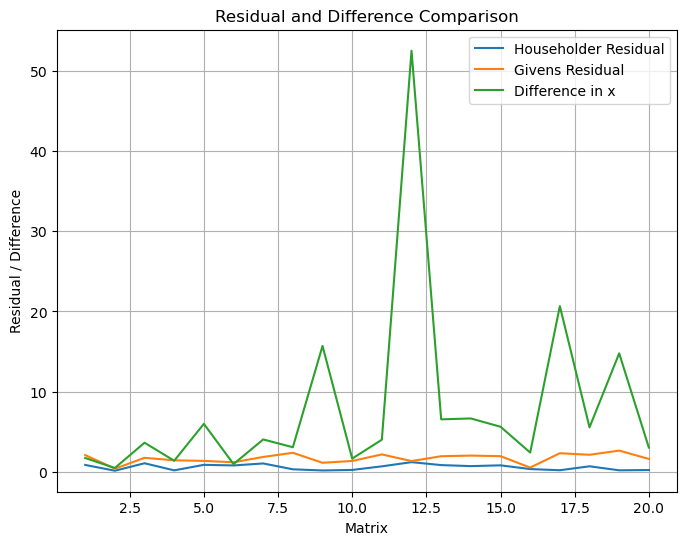

In [26]:
import numpy as np
import matplotlib.pyplot as plt

def test_implementation():
    num_matrices = 20
    results_table = np.zeros((num_matrices, 3))

    for i in range(num_matrices):
        ############### Generiere zufällige Matrix A und Vektor b
        A = np.random.rand(3, 3)
        b = np.random.rand(3)
        
        #L = cholesky_decomposition(np.dot(A.T, A))
        #print("Cholesky-Zerlegung:")
        #print("L:")
        #print(L)

        # Gaußsche Normalengleichungen
        #x_normal_eq = solve_least_squares_normal_equations(A, b)
        #print("Lösung des linearen Ausgleichsproblems (Gaußsche Normalengleichungen):")
        #print("x:")
        #print(x_normal_eq)

        ############### Householder-Orthogonalisierung
        '''
        _, R_householder = householder_transformation(A) /_, _, R_givens = givens_rotation(A)
         wir das _ (Unterstrich) zum Ignorieren der Werte von Q_householder/Q_givens und H_householder/H_givens, da wir sie in diesem Kontext nicht benötigen.
         Wir speichern nur den Wert von R_householder, der eine obere Dreiecksmatrix ist, die nach der Anwendung der Householder-Transformation erhalten wird.
        
        '''

        _, R_householder = householder_transformation(A)
        b1_householder = np.dot(Q_householder.T, b)[:R_householder.shape[1]]
        x_householder = solve_reduced_system(R_householder, b1_householder)
        residual_householder = np.linalg.norm(b - np.dot(A, x_householder))

        ############## Givens-Rotation
        _, R_givens = givens_rotation(A)
        b1_givens = np.dot(Q_givens.T, b)[:R_givens.shape[1]]
        x_givens = solve_reduced_system(R_givens, b1_givens)
        residual_givens = np.linalg.norm(b - np.dot(A, x_givens))

        ############## Ergebnisse speichern
        '''
        Diese Code-Zeile berechnet die Residuen und den Unterschied zwischen den Lösungen, 
        die durch die Householder-Methode und die Givens-Methode zur Lösung des linearen Gleichungssystems erhalten wurden.
        
        '''
        results_table[i] = [residual_householder, residual_givens, np.linalg.norm(x_householder - x_givens)]

    # Tabelle ausgeben
    print("Ergebnisse:")
    print("Matrix\t\tHouseholder Residual\tGivens Residual\tDifference in x")
    for i, row in enumerate(results_table):
        print(f"{i+1}\t\t{row[0]}\t\t\t{row[1]}\t\t{row[2]}")

    # Diagramm erstellen
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, num_matrices + 1), results_table[:, 0], label="Householder Residual")
    plt.plot(range(1, num_matrices + 1), results_table[:, 1], label="Givens Residual")
    plt.plot(range(1, num_matrices + 1), results_table[:, 2], label="Difference in x")
    plt.xlabel("Matrix")
    plt.ylabel("Residual / Difference")
    plt.title("Residual and Difference Comparison")
    plt.legend()
    plt.grid(True)
    plt.show()

# Testen der Implementierung
test_implementation()
